# Lab Task-9
- Name: `Pankaj Mahanta`
- Id: `213902002`
- Section: `213D4`

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
# Load dataset
# (For this experiment, we'll use Mall Customers dataset)
# url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mall_customers.csv"
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Select features
X = df[['Annual Income (k$)','Spending Score (1-100)']].values

In [15]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [9]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [10]:
# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

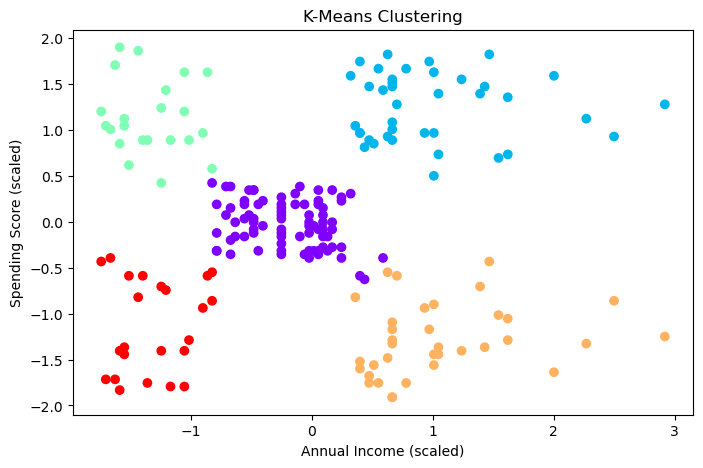

In [11]:
# Plot K-Means result
plt.figure(figsize=(8,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_labels, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [12]:
# Apply DBSCAN with varying epsilon and MinPts
epsilons = [0.5, 1.0, 1.5, 2.0, 2.5]
min_samples = [3, 5, 7, 10]

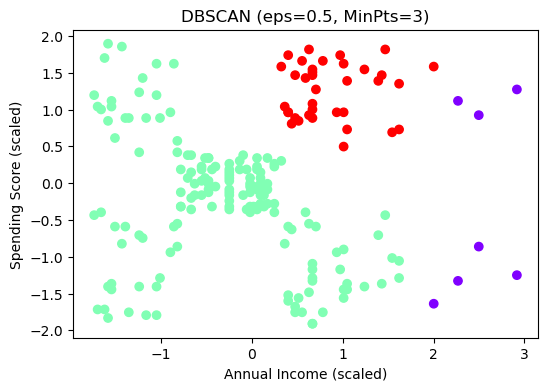

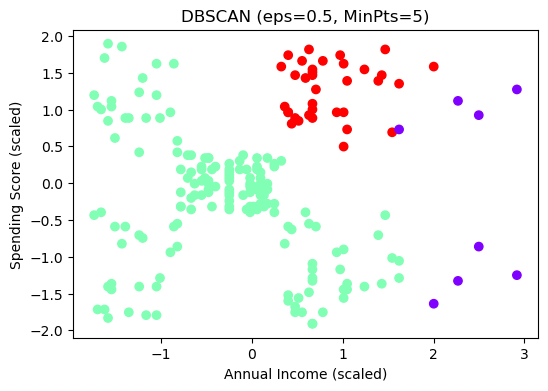

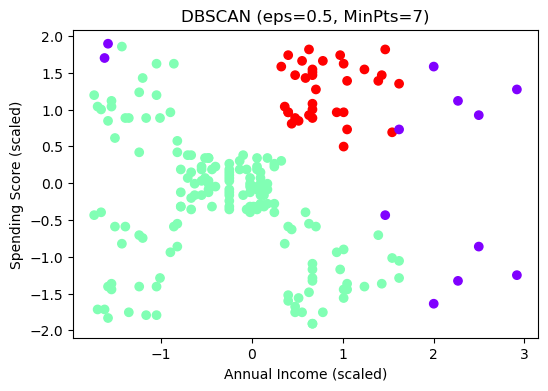

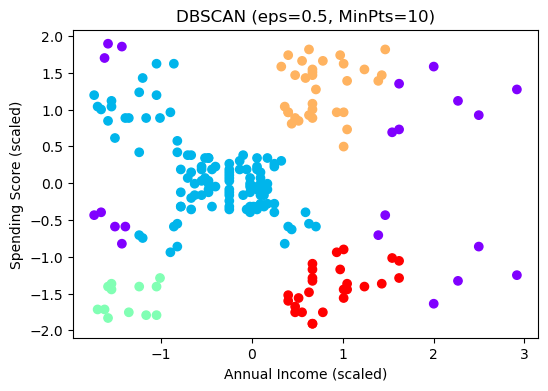

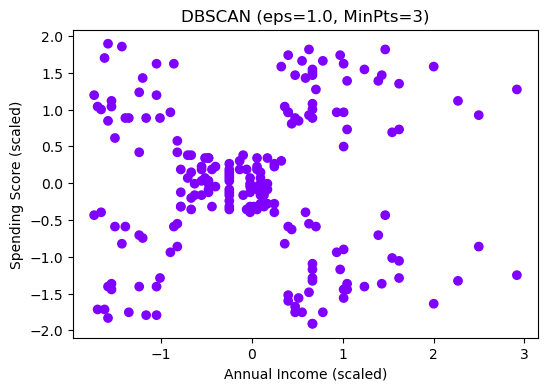

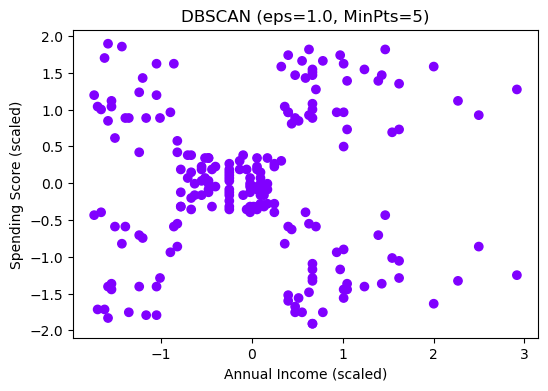

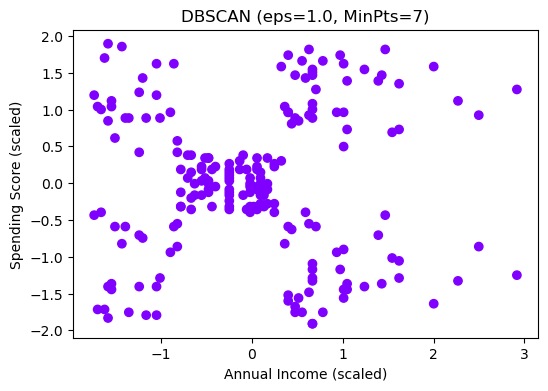

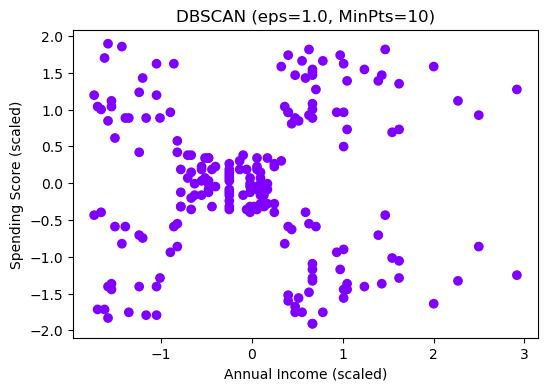

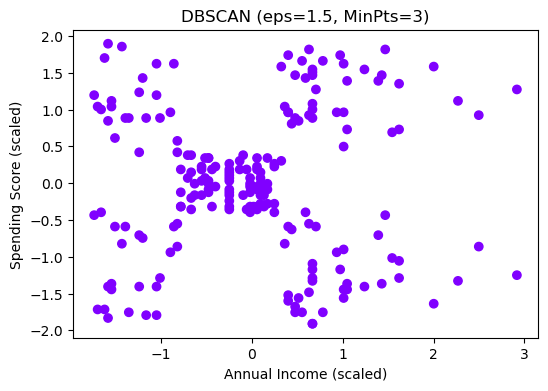

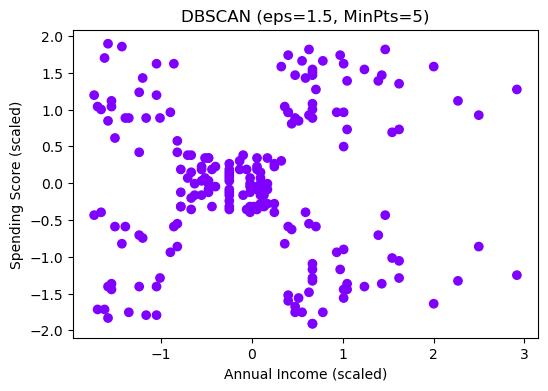

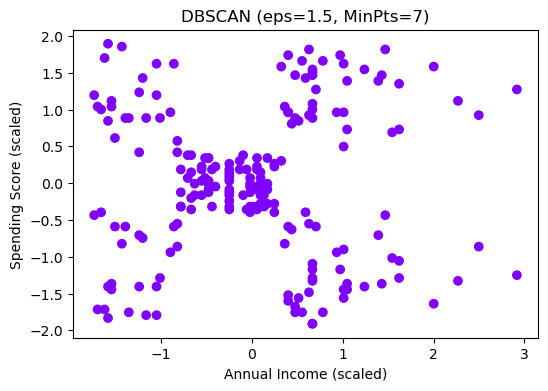

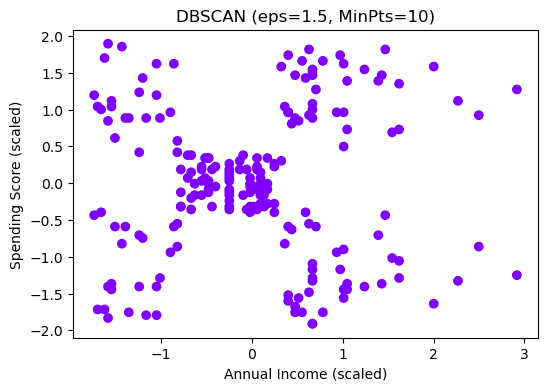

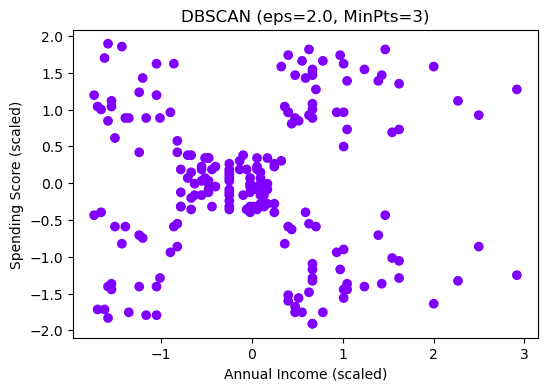

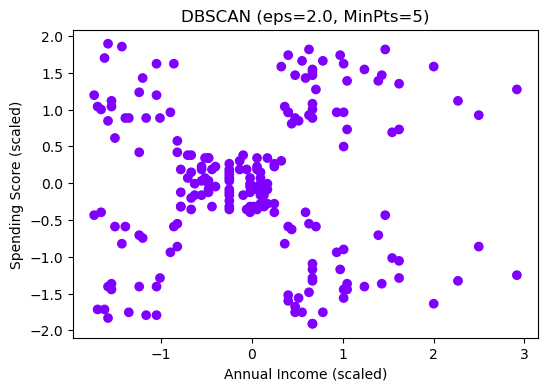

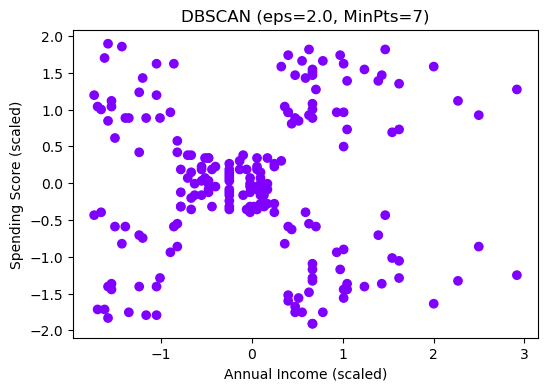

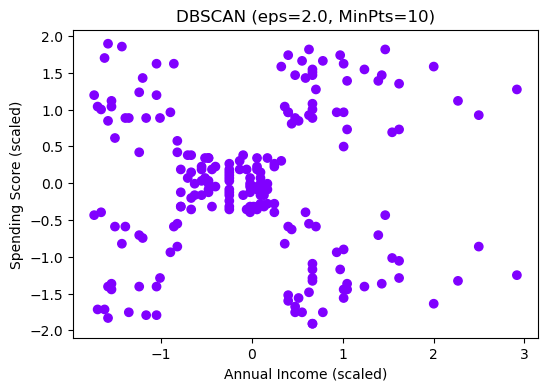

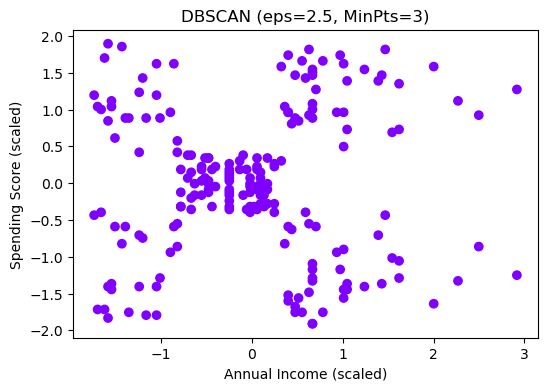

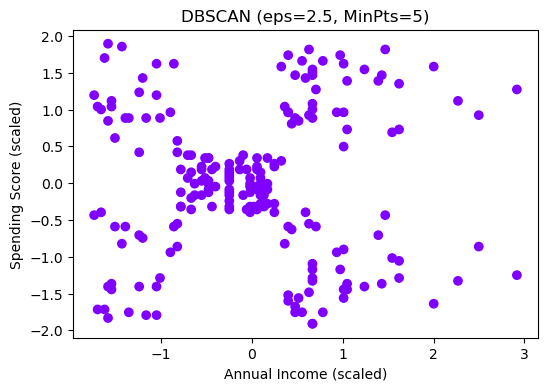

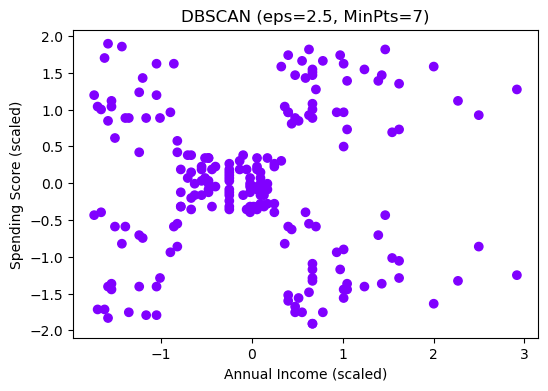

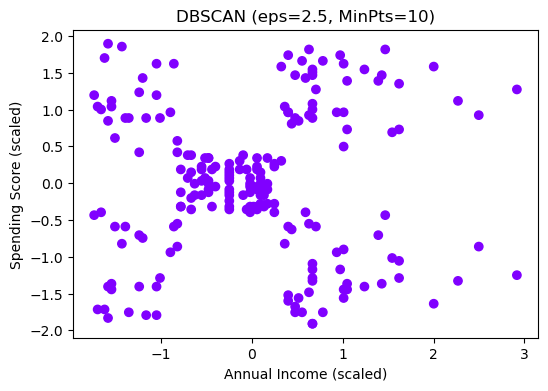

In [13]:
results = []

for eps in epsilons:
    for min_pts in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        labels = dbscan.fit_predict(X_scaled)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Silhouette score only if >1 cluster
        sil_score = -1
        if n_clusters > 1:
            sil_score = silhouette_score(X_scaled, labels)
        
        results.append((eps, min_pts, n_clusters, n_noise, sil_score))
        
        # Visualization
        plt.figure(figsize=(6,4))
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='rainbow')
        plt.title(f'DBSCAN (eps={eps}, MinPts={min_pts})')
        plt.xlabel('Annual Income (scaled)')
        plt.ylabel('Spending Score (scaled)')
        plt.show()


In [14]:
# Results Table
results_df = pd.DataFrame(results, columns=['Epsilon', 'MinPts', 'Clusters', 'Noise Points', 'Silhouette Score'])
print(results_df)

    Epsilon  MinPts  Clusters  Noise Points  Silhouette Score
0       0.5       3         2             7          0.356602
1       0.5       5         2             8          0.350446
2       0.5       7         2            12          0.352615
3       0.5      10         4            21          0.406405
4       1.0       3         1             0         -1.000000
5       1.0       5         1             0         -1.000000
6       1.0       7         1             0         -1.000000
7       1.0      10         1             0         -1.000000
8       1.5       3         1             0         -1.000000
9       1.5       5         1             0         -1.000000
10      1.5       7         1             0         -1.000000
11      1.5      10         1             0         -1.000000
12      2.0       3         1             0         -1.000000
13      2.0       5         1             0         -1.000000
14      2.0       7         1             0         -1.000000
15      